# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
duplicated_row_series = combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
type(duplicated_row_series)

pandas.core.series.Series

In [4]:
combined_df[duplicated_row_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
bad_mice = combined_df.loc[duplicated_row_series, "Mouse ID"].unique()
bad_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mice IDs.
bad_mice_row_series = combined_df["Mouse ID"].isin(bad_mice)
combined_df[bad_mice_row_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_df[~bad_mice_row_series]
print(new_df.shape)
new_df.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
new_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi = new_df.groupby(["Drug Regimen"])
vol = "Tumor Volume (mm3)"
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = regi[vol].mean()
median = regi[vol].median()
variance = regi[vol].var()
std_dev = regi[vol].std()
sem = regi[vol].sem()

drug_df = pd.DataFrame({
                        "Mean Tumor Volume": mean,
                        "Median Tumor Volume" : median,
                        "Tumor Volume Variance" : variance,
                        "Tumor Volume Std. Dev." : std_dev,
                        "Tumor Volume Std. Err." : sem
                        })
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = regi[vol].agg(["mean", "median", "var", "std", "sem"])
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

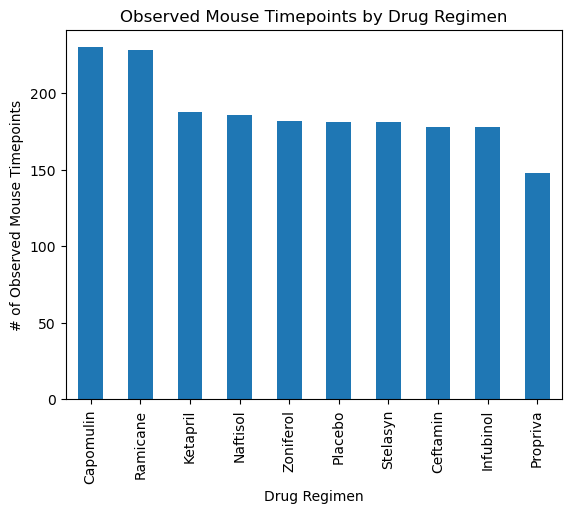

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = new_df.groupby(["Drug Regimen"])["Timepoint"].count()
sorted_pandas_bar = pandas_bar.sort_values(ascending=False)
sorted_pandas_bar.plot(kind="bar", title="Observed Mouse Timepoints by Drug Regimen", 
                       ylabel= "# of Observed Mouse Timepoints")
plt.show()

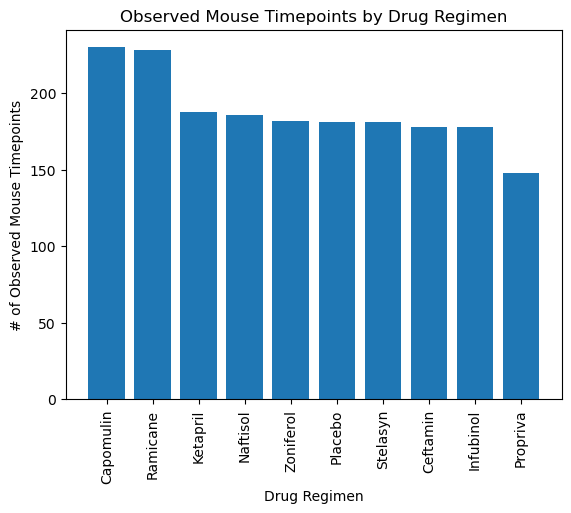

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(sorted_pandas_bar.index, sorted_pandas_bar)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.title("Observed Mouse Timepoints by Drug Regimen")
plt.show()

<Axes: ylabel='Sex'>

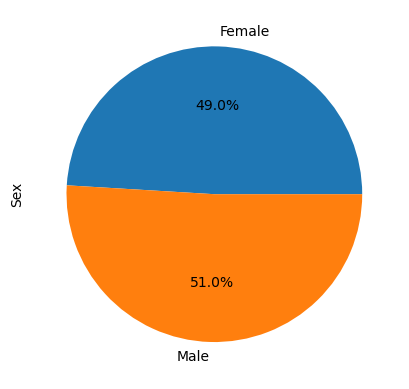

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = new_df.groupby(["Sex"])["Sex"].count()
sex.plot(kind="pie", labels=["Female", "Male"], autopct="%1.1f%%")

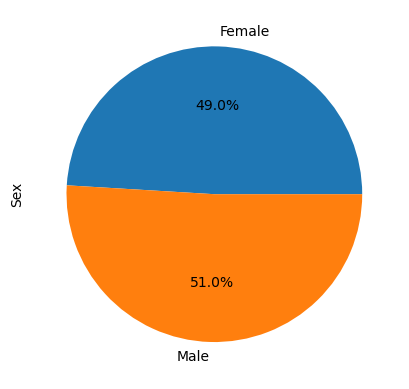

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=["Female", "Male"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=new_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df=pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tmpt_df = pd.merge(new_df, last_timepoint_df, on=("Mouse ID", "Timepoint"))
tmpt_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []
# For each promising treatment
for treatment in treatments:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_filter_series = tmpt_df["Drug Regimen"] == treatment
    drug_tumor_vol = tmpt_df.loc[drug_filter_series, "Tumor Volume (mm3)"]
    # add the tumor volume series to the plotting list
    vol_data.append(drug_tumor_vol)
    # Calculate the IQR, lower bound, and upper bound for this drug and check potential outliers. 
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [x for x in drug_tumor_vol if x < lower_bound or x > upper_bound] 
    print(f"{treatment}'s upper bound: {upper_bound}.")
    print(f"{treatment}'s lower bound: {lower_bound}.")
    print(f"{treatment}'s potential outliers: {outliers}.")

Capomulin's upper bound: 51.83201549.
Capomulin's lower bound: 20.70456164999999.
Capomulin's potential outliers: [].
Ramicane's upper bound: 54.30681135.
Ramicane's lower bound: 17.912664470000003.
Ramicane's potential outliers: [].
Infubinol's upper bound: 82.74144559000001.
Infubinol's lower bound: 36.83290494999999.
Infubinol's potential outliers: [36.3213458].
Ceftamin's upper bound: 87.66645829999999.
Ceftamin's lower bound: 25.355449580000002.
Ceftamin's potential outliers: [].


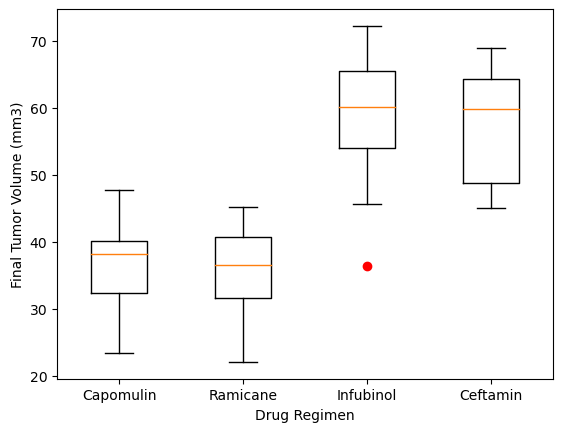

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data, sym="ro")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

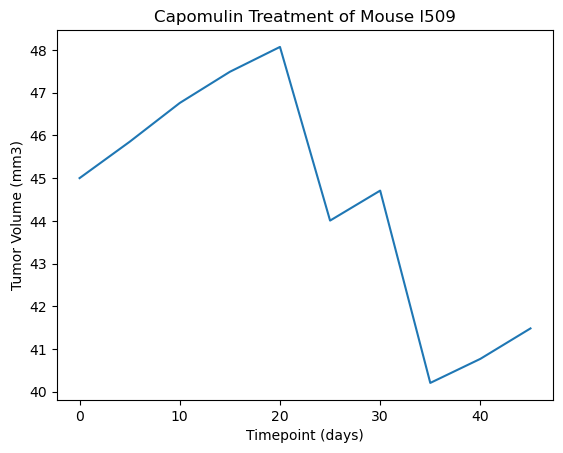

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = new_df.loc[new_df["Mouse ID"] == "l509", :]
l5_tmpt = l509_df["Timepoint"]
l5_vol = l509_df["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(l5_tmpt, l5_vol)
plt.show()

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin",:]


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
